In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [9]:
data=pd.read_csv("F:\Assignments\Association Rules\\book.csv")

In [10]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [11]:
data.shape

(2000, 11)

In [12]:
data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [14]:
from mlxtend.frequent_patterns import apriori,association_rules

In [15]:
frequent_itemsets = apriori(data,min_support=0.010,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
11097,(ArtBks),"(ChildBks, ItalArt, ItalAtlas, RefBks, CookBks...",0.2410,0.0110,0.011,0.045643,4.149378,0.008349,1.036300
11098,(ItalAtlas),"(ChildBks, ItalArt, ArtBks, RefBks, CookBks, I...",0.0370,0.0145,0.011,0.297297,20.503262,0.010463,1.402442
11099,(RefBks),"(ChildBks, ItalArt, ArtBks, ItalAtlas, CookBks...",0.2145,0.0110,0.011,0.051282,4.662005,0.008640,1.042459
11100,(CookBks),"(ChildBks, ItalArt, ArtBks, ItalAtlas, RefBks,...",0.4310,0.0110,0.011,0.025522,2.320186,0.006259,1.014902


In [16]:
rules[(rules['lift']>= 1.1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
11065,"(CookBks, ArtBks, ItalAtlas)","(ChildBks, ItalArt, ItalCook, RefBks)",0.0140,0.0145,0.0110,0.785714,54.187192,0.010797,4.599000
11066,"(ArtBks, ItalAtlas, ItalCook)","(CookBks, ChildBks, ItalArt, RefBks)",0.0130,0.0150,0.0110,0.846154,56.410256,0.010805,6.402500
11081,"(ItalAtlas, ItalArt)","(ChildBks, ArtBks, RefBks, CookBks, ItalCook)",0.0165,0.0220,0.0110,0.666667,30.303030,0.010637,2.934000
11082,"(ItalArt, RefBks)","(ChildBks, ArtBks, ItalAtlas, CookBks, ItalCook)",0.0200,0.0115,0.0110,0.550000,47.826087,0.010770,2.196667


In [17]:
frequent_itemsets = apriori(data,min_support=0.050,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(GeogBks, DoItYBks, ArtBks, CookBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
658,(GeogBks),"(ArtBks, DoItYBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
659,(DoItYBks),"(GeogBks, ArtBks, ChildBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
660,(ArtBks),"(GeogBks, DoItYBks, ChildBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939


In [18]:
rules[(rules['lift']>= 1.5) & (rules['confidence'] >= 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
7,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
...,...,...,...,...,...,...,...,...,...
633,"(GeogBks, DoItYBks, ChildBks, CookBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845
634,"(GeogBks, ArtBks, ChildBks, CookBks)",(DoItYBks),0.0835,0.282,0.0535,0.640719,2.272052,0.029953,1.998433
635,"(ArtBks, DoItYBks, ChildBks, CookBks)",(GeogBks),0.0820,0.276,0.0535,0.652439,2.363910,0.030868,2.083088
636,"(GeogBks, DoItYBks, ArtBks, CookBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


In [19]:
frequent_itemsets = apriori(data,min_support=.1,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [20]:
rules[(rules['lift']>= 1.5) & (rules['confidence'] >= 0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
90,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812


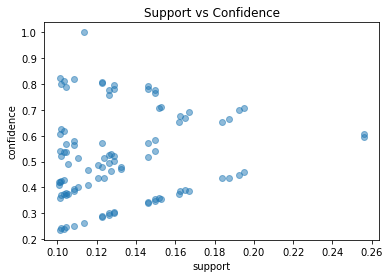

In [21]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

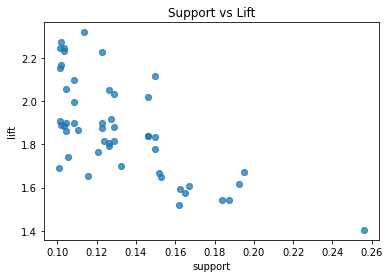

In [22]:
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

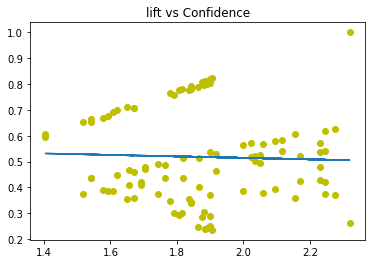

In [23]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))